In [1]:
sc

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
2,application_1675443522228_0003,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-2>

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
n_samples=1600
n_clusters=3
n_features =2

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# Creating a n_features=2 Dim dataset with centers=3 clusters
Xs, Ys = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)
print(Xs.shape)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(1600, 2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

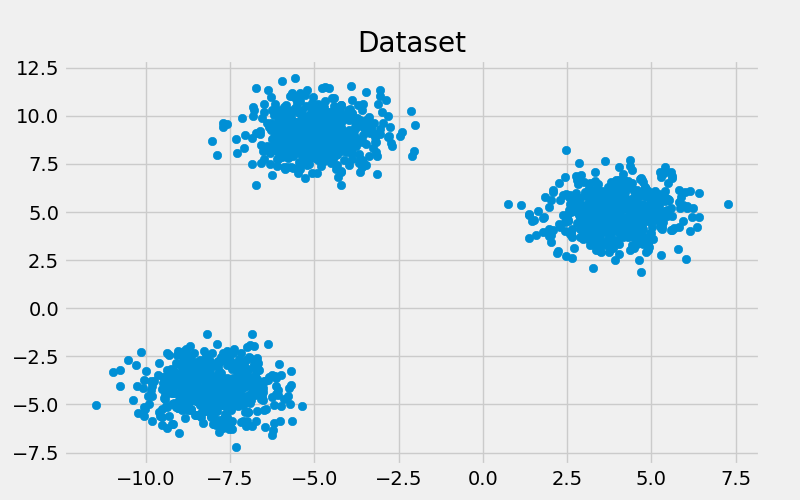

In [6]:
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

ax0 = fig.add_subplot(111)
ax0.scatter([point[0] for point in Xs], [point[1] for point in Xs])
ax0.set_title('Dataset')

%matplot plt

In [7]:
df=spark.createDataFrame(pd.DataFrame(Xs,columns=list(['x1','x2'])))
df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+
|                x1|                x2|
+------------------+------------------+
|-8.611990756276265|-4.757827364824287|
|2.6512077325001338|2.6228186584930127|
| 2.090897684104265| 4.051017690508023|
|-4.819822886937037| 8.504268768165153|
| 2.198850669114548|2.8681360456379967|
+------------------+------------------+
only showing top 5 rows

In [8]:
vecAssembler = VectorAssembler(inputCols=df.columns, outputCol="features")
vector_df = vecAssembler.transform(df)
vector_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+--------------------+
|                x1|                x2|            features|
+------------------+------------------+--------------------+
|-8.611990756276265|-4.757827364824287|[-8.6119907562762...|
|2.6512077325001338|2.6228186584930127|[2.65120773250013...|
| 2.090897684104265| 4.051017690508023|[2.09089768410426...|
|-4.819822886937037| 8.504268768165153|[-4.8198228869370...|
| 2.198850669114548|2.8681360456379967|[2.19885066911454...|
+------------------+------------------+--------------------+
only showing top 5 rows

In [9]:
print(vector_df.collect()[0])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(x1=-8.611990756276265, x2=-4.757827364824287, features=DenseVector([-8.612, -4.7578]))

In [11]:
vector_df.rdd.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16

In [12]:
kmeans = KMeans().setK(n_clusters).setSeed(1)
model = kmeans.fit(vector_df )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Make predictions
predictions_df = model.transform(vector_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# Shows the result.
centers = model.clusterCenters()
C=np.array(centers)
print(C)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[-8.01751698 -4.12815193]
 [-4.91333347  9.07577452]
 [ 3.93863506  4.94362012]]

In [15]:
predictions_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+--------------------+----------+
|                x1|                x2|            features|prediction|
+------------------+------------------+--------------------+----------+
|-8.611990756276265|-4.757827364824287|[-8.6119907562762...|         0|
|2.6512077325001338|2.6228186584930127|[2.65120773250013...|         2|
| 2.090897684104265| 4.051017690508023|[2.09089768410426...|         2|
|-4.819822886937037| 8.504268768165153|[-4.8198228869370...|         1|
| 2.198850669114548|2.8681360456379967|[2.19885066911454...|         2|
+------------------+------------------+--------------------+----------+
only showing top 5 rows

In [16]:
predictions=predictions_df.collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

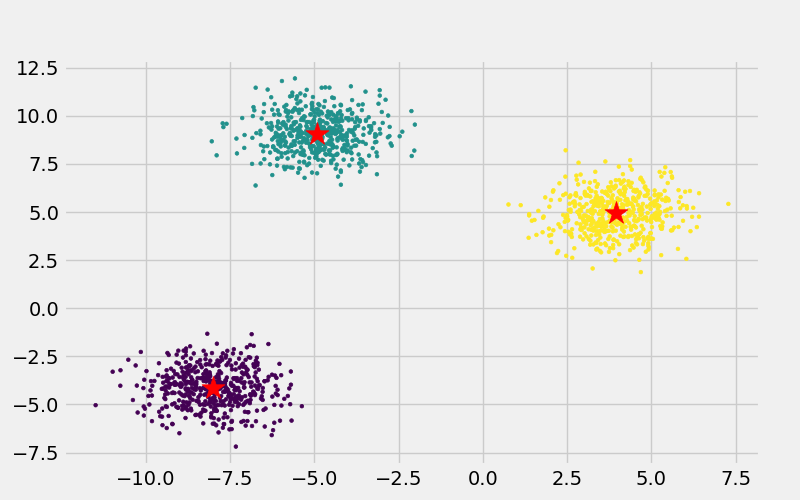

In [19]:
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids

plt.scatter([actdata['x1'] for actdata in predictions], [actdata['x2'] for actdata in predictions],c=[actdata['prediction'] for actdata in predictions], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=300, c='r')

%matplot plt
